# Outlier detection and removal using IQR

We will be using IQR technique to remove outliers.

Topics:

1. What is percentile and IQR?
2. Remove outliers using IQR
3. Exercise

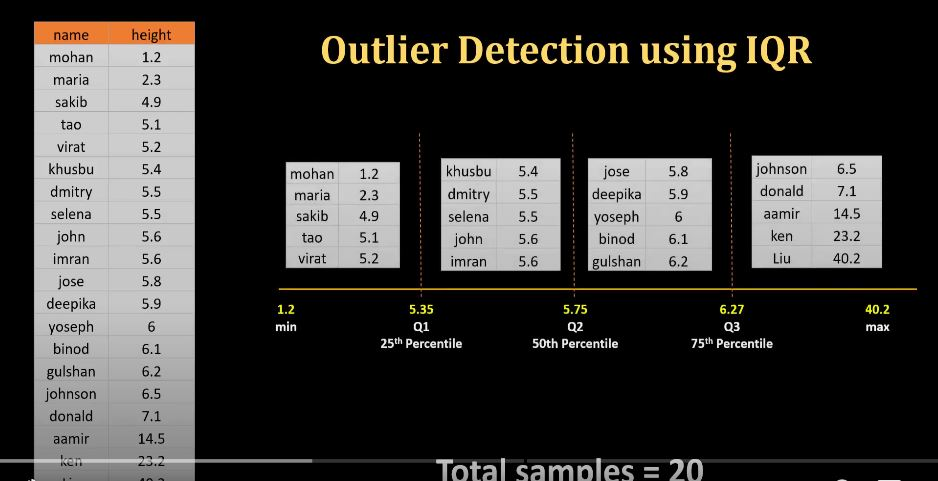

Here we have a heights dataset and by visual examination we can easily tell that there are some outliers and these heights are in feet and ofcourse we cannot have a person with 40 feet height hence all of these are outliers, like anything more than 77.1 inches. Similarly this is an adult dataset hence 1.2 and 2.3 feet height is is clearly an outlier. Now how can we detect the same thing using an IQR technique and inorder to understand IQR we first need to understand percentile, now what is percentile. **Percentile is basically for example as shown in figure we have this Q1 as 5.35 which is 25th percentile and 25th percentile value means in our dataset 25% of samples are below this value, so total samples here are 20, so 25% of 20 is 5 and 5 samples here are having value less than 5.35 5.0 5.1 and all these values are less than 5.35 hence this is 25th percentile. Similarly 75th percentile will be a value which is 6.27 so 75% of samples are having value less than 6.27 and that is why 6.27 is called 75th percentile, the maximum value will be called 100th percentile because all the values are below that value and similarly minimum value will be called 0 percentile because that doesnt have any value less than that particular value, so this is a quick summary of percentile and if we know percentile so we can easily calculate IQR by dipping Q3 and Q1 here Q3 which is a 75th percentile that is 6.27-5.35 is Q1 = 0.925 is the IQR value and now to remove outliers we need to come with lower and upper limit.**

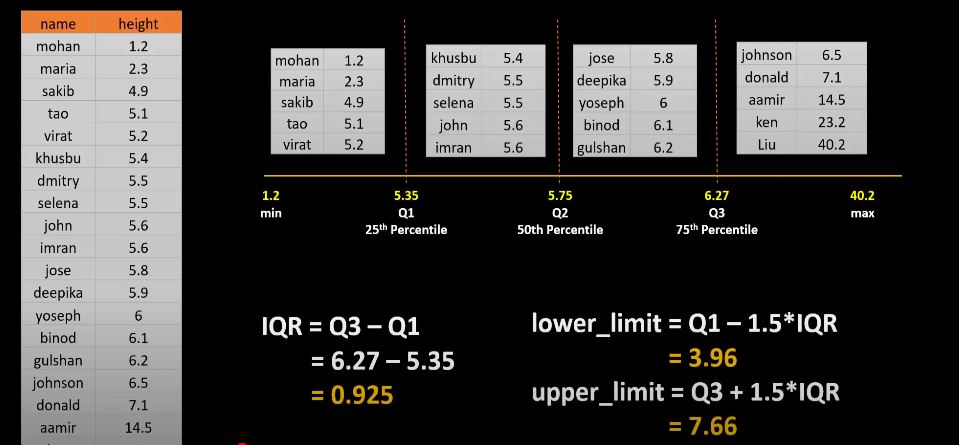

Our lower limit will be Q1 which is 25th percentile minus 1.5*IQR and IQR is just the distance between percentiles so we take that distance multiplied by 1.5 and add half into it and then we extend that from Q1 5.35 - 1.5 and we get the value 3.96 and similarly upper limit will be Q3+1.5 IQR, they just came up with this number 7.66 and we have to remember this to do 1.5 IQR + Q3 to get the upper limit.

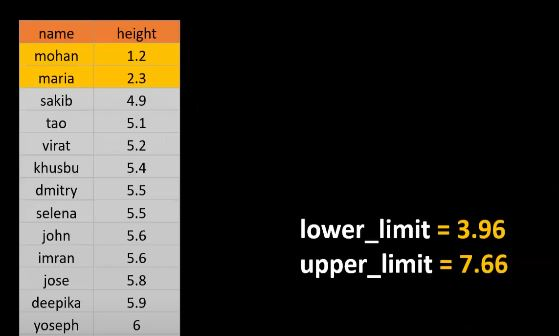

Once we know the upper and lower limit we can exclude all the data points which has value less than lower limit i-e 3.96 and in the dataset the yellow colored rows are excluded as they are less than lower limits and is marked as outliers and any value greater than upper limit i-e 7.66 will also be excluded as shown and just by looking at this dataset we can visualize that IQR is just like working smoothly in this case because most of the people will have heights in this range as describe and adults having 2.3 feet height is very less and adult having height of 14 feet is also not possible.

# Coding

In [1]:
import pandas as pd

df = pd.read_csv('04_heights.csv')
df.head()

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [2]:
df.shape

(20, 2)

In [3]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [5]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(np.float64(5.3500000000000005), np.float64(6.275))

In [7]:
IQR = Q3 - Q1
IQR

np.float64(0.9249999999999998)

In [9]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(np.float64(3.962500000000001), np.float64(7.6625))

In [10]:
df[(df.height < lower_limit) | (df.height > upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [11]:
df_no_outlier = df[(df.height > lower_limit) & (df.height < upper_limit)]
df_no_outlier

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


In [12]:
df_no_outlier.shape

(15, 2)

In [13]:
df.shape[0] - df_no_outlier.shape[0]

5